
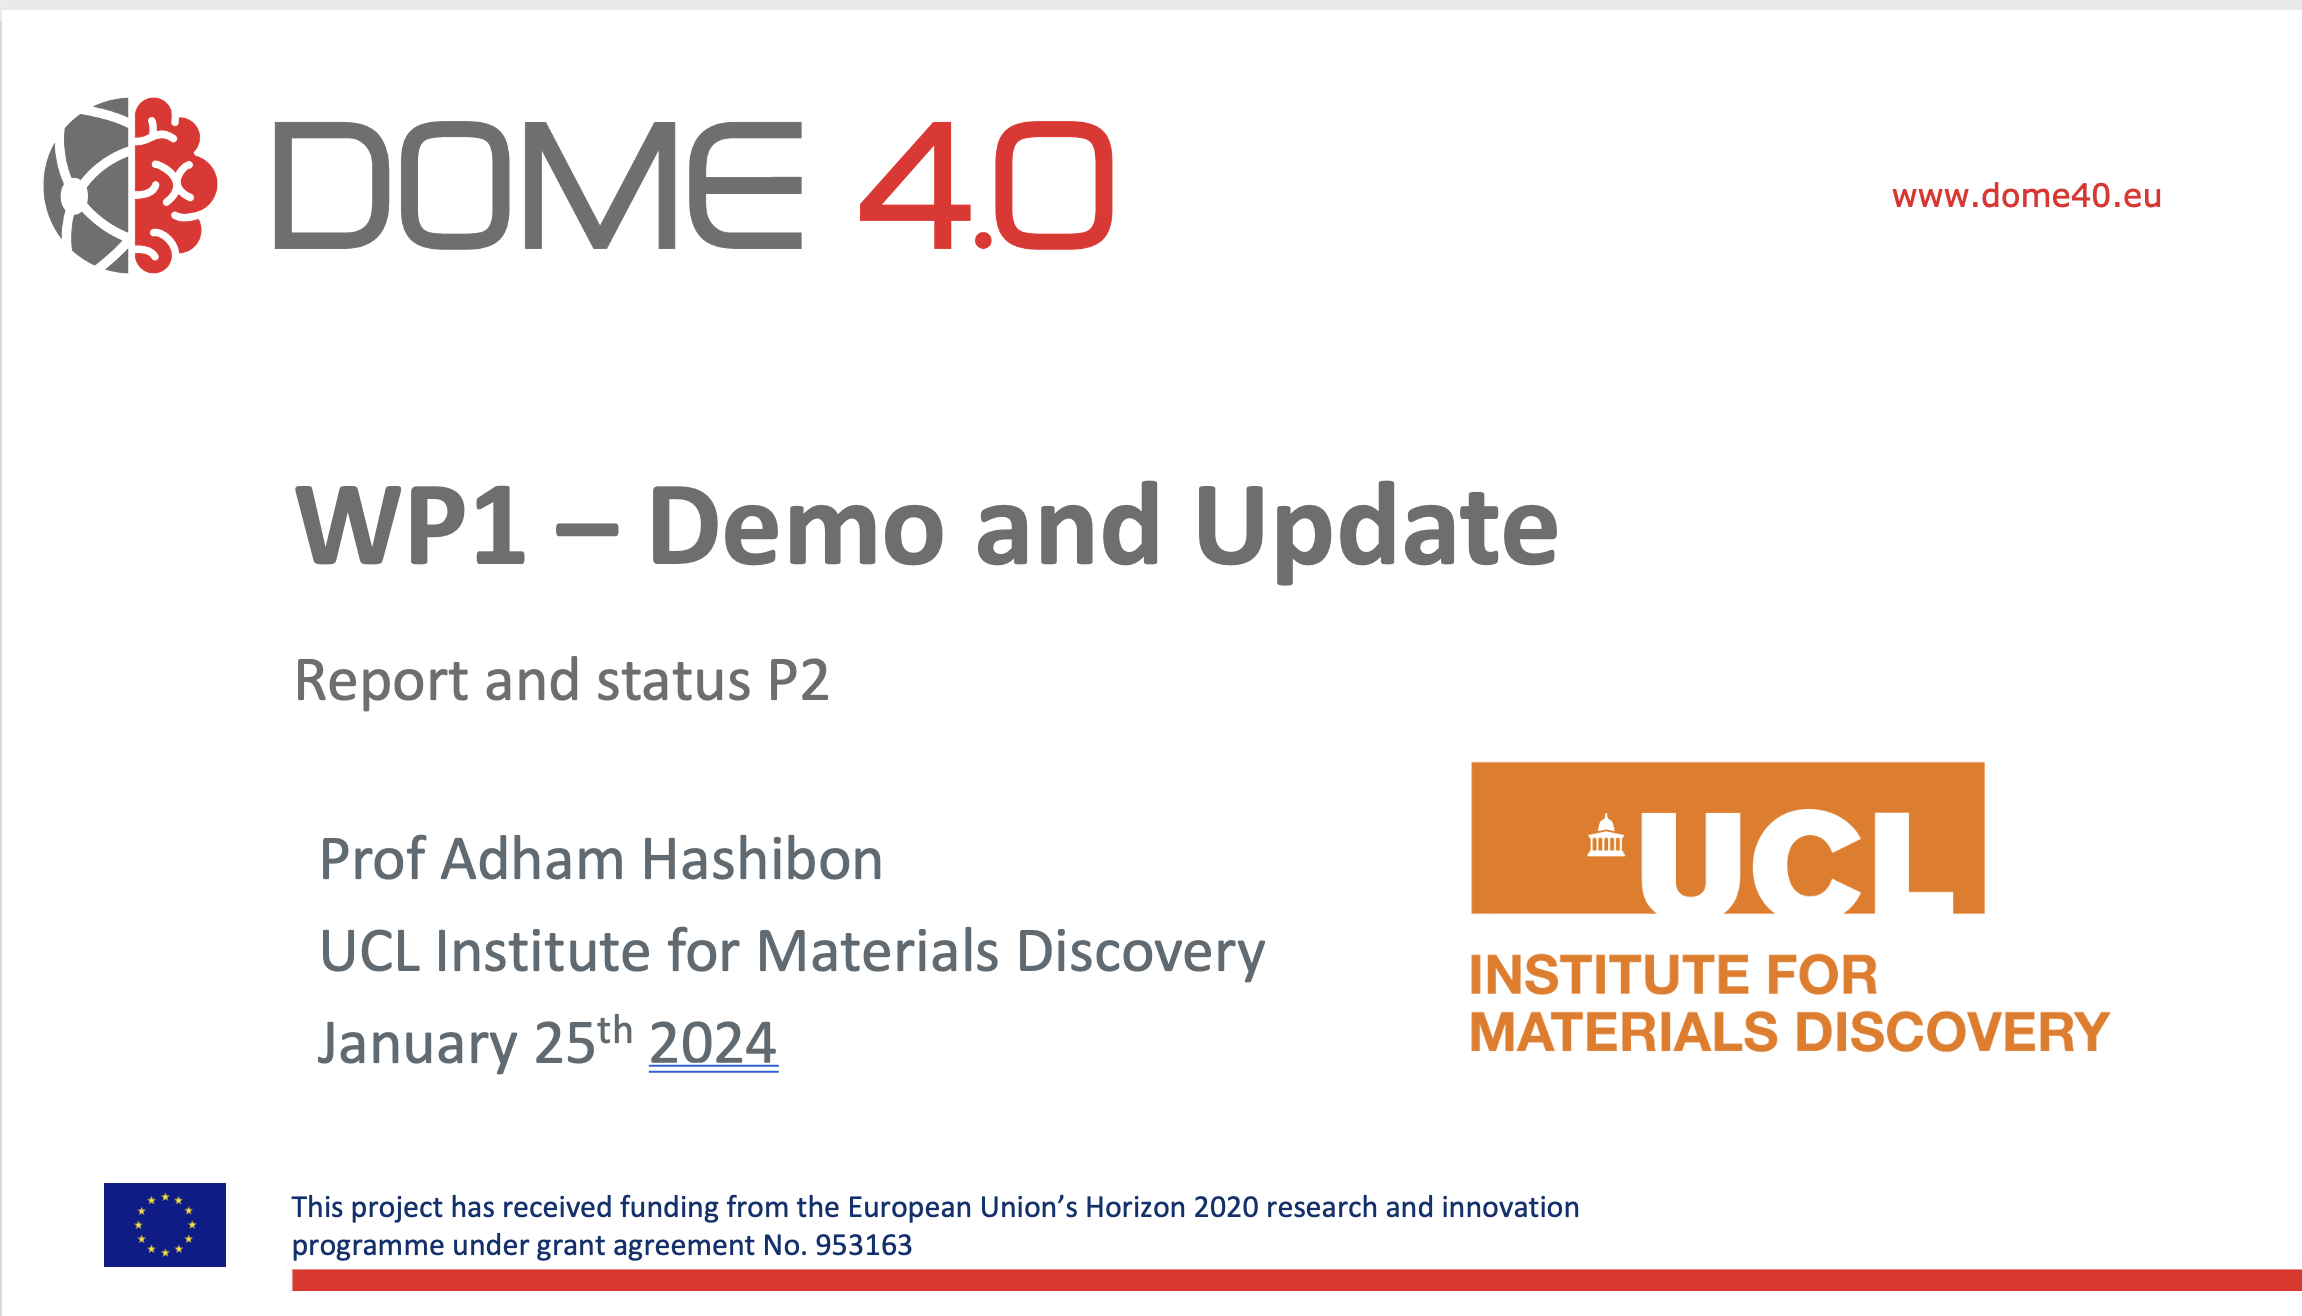


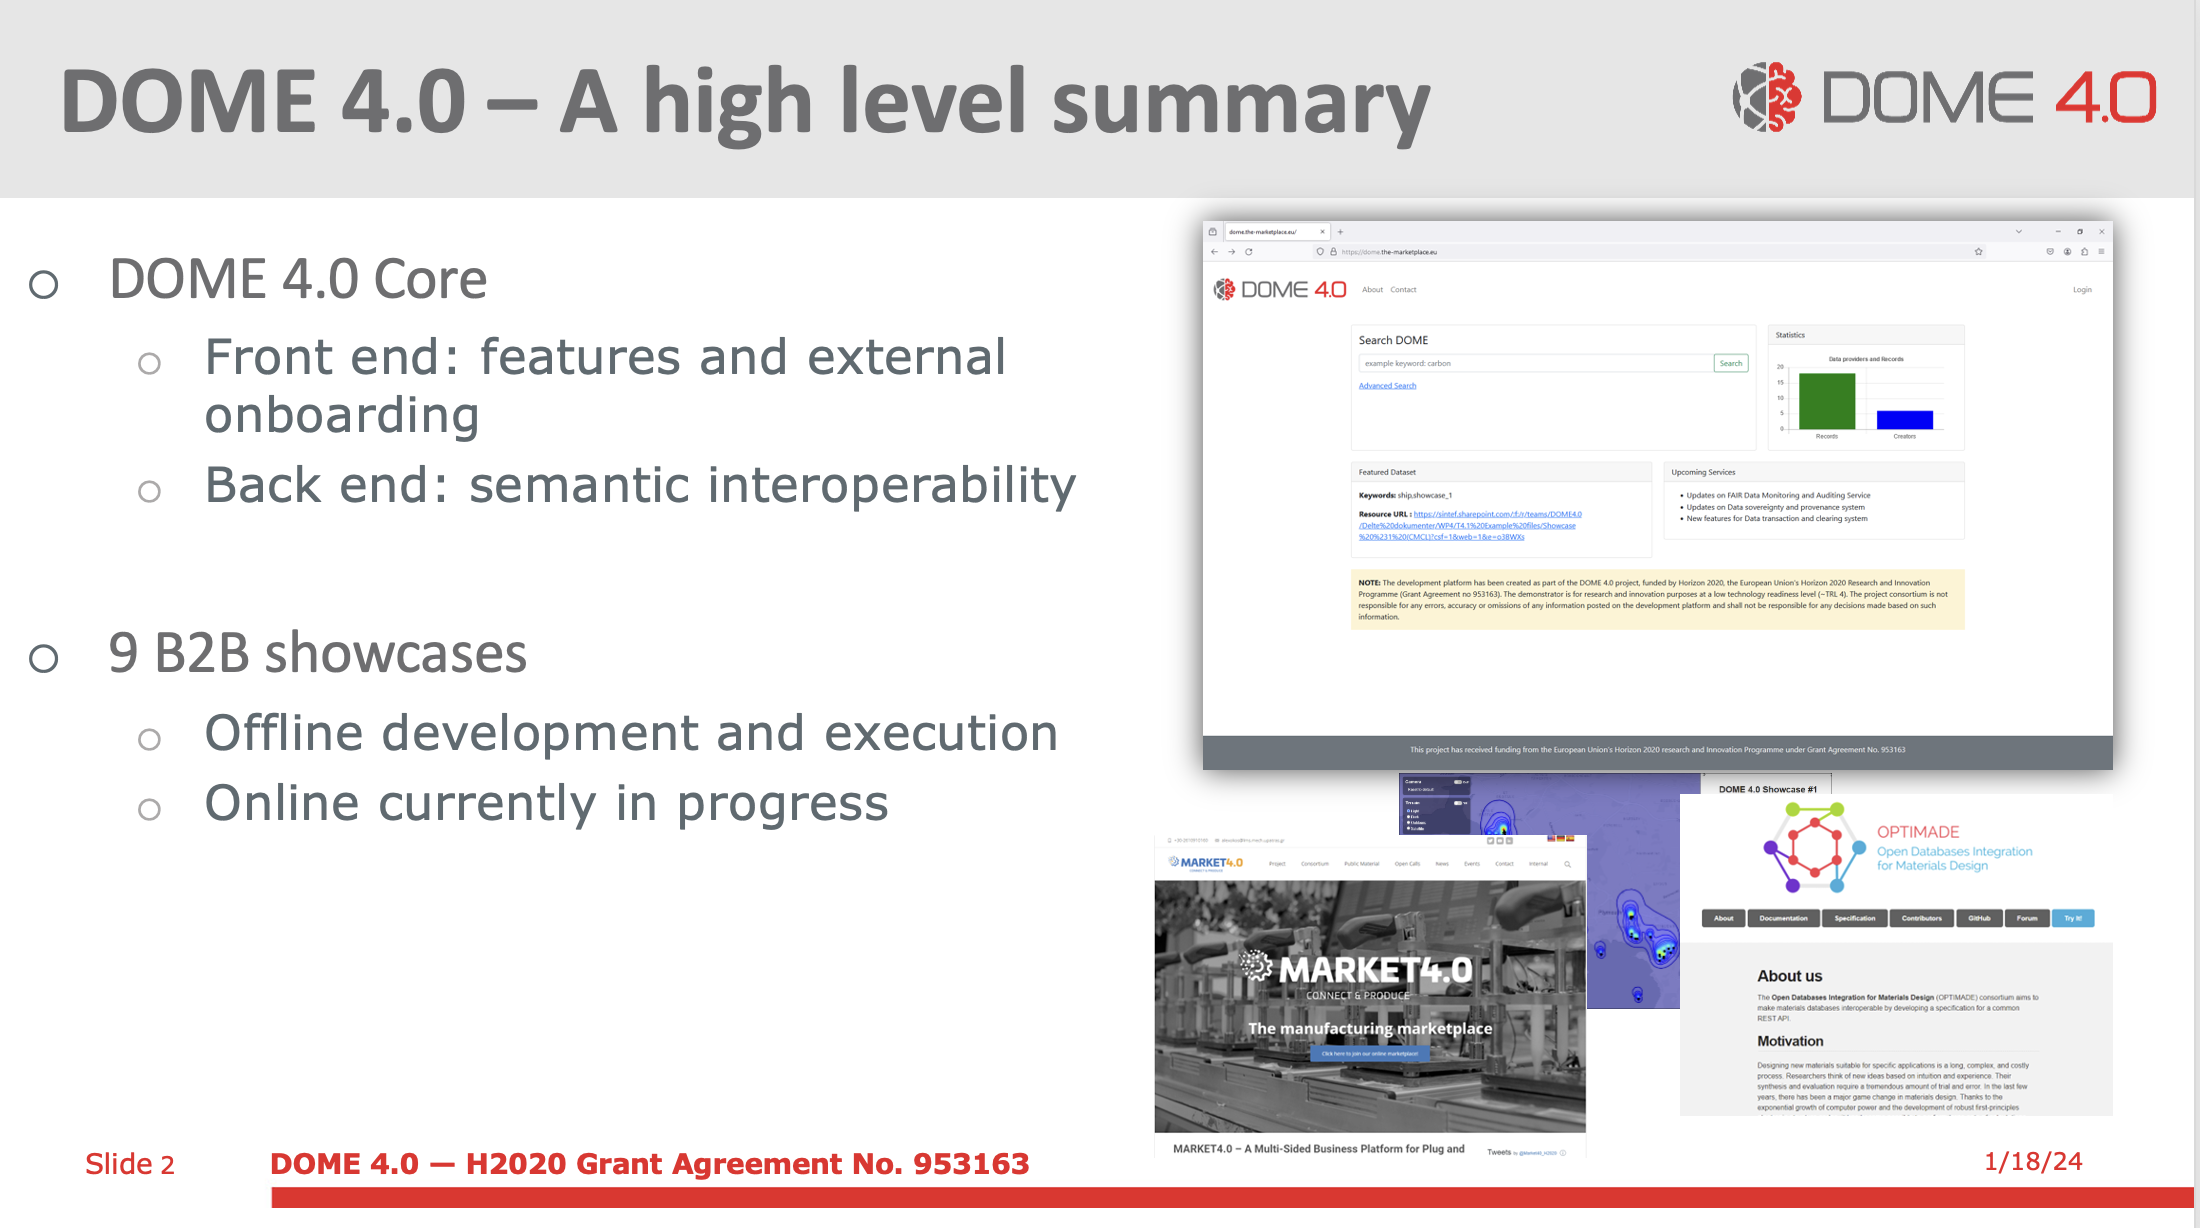

# Outline
- Focus on the Semantic Discovery and Knowledge Base backend components
- Demonstrate mapping and linking of communities semantically 
- Integration of third party **ontology** and *data*
  - [EU data infrastructure](https://data.europa.eu/data/sparql?locale=en)
- Demo: Synthetic case study of the backend - linking materialsproject.org, EuroSciVoc and DOME 4.0!

# Outline of the Steps
- Load the ontology eco system - as basis for all data and knowldge!
- Create fully semantic data sets (Tier1: compliant with DOME 4.0 data Set Ontology)
- Demonstrate Visualisation and SparQL and python query

# Note: 

This work is largely based on D3.6, it extends SimPhoNy-Future into a new Package developed specifcally with DOME requirements in mind: **Ontology_Manager**, **OntoVIS** and **sigraDB**. 

DomeDataSetfrom D3.6 is in /Users/adham/dev/dome/Ontology-matters/domeo/domeo.ttl


In [2]:
from ontology_manager.ontology_utils import OntologyManager # loading the DOME 4.0 Ontology Manager Package
from rdflib import Graph, URIRef, Namespace, Literal, BNode, collection
from rdflib.namespace import SKOS, RDF, RDFS, OWL
from datetime import date

In [3]:
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph, rdflib_to_graphtool
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
from ontodot.ontodot import vis, random_date_time, auto_bind_namespaces, printH, generate_uuid, generate_random_materialproject_id
from ontodot.ontodot import OntoVis

In [5]:
from types import SimpleNamespace # We use simple name spaces, it is a basis for the new SimPhpNy Future
import os, random

In [6]:
dome=SimpleNamespace() # This is equivalent to a *SimPhoNy lightweight session* 

# Load the DOME 4.0 ecosystem CORE ontology 

In [7]:
dome.g=Graph(bind_namespaces="rdflib")  # We are using RDFLIB directly, without any wrappers on top of it for efficiency.
dome.ns=Namespace('https://dome40.eu/semantics/dome4.0_core#')
dome.path = "/Users/adham/dev/ontology/dome/Ontology-matters/"
dome.file='dome4.0_core_tbox.ttl'

In [8]:
dome.g.parse(os.path.join(dome.path, dome.file))

<Graph identifier=N6973b87c13804d45832885c342b4caf8 (<class 'rdflib.graph.Graph'>)>

# Visualise

### *We will be available in enhanced - interactive/modern form - on the front end with final release*

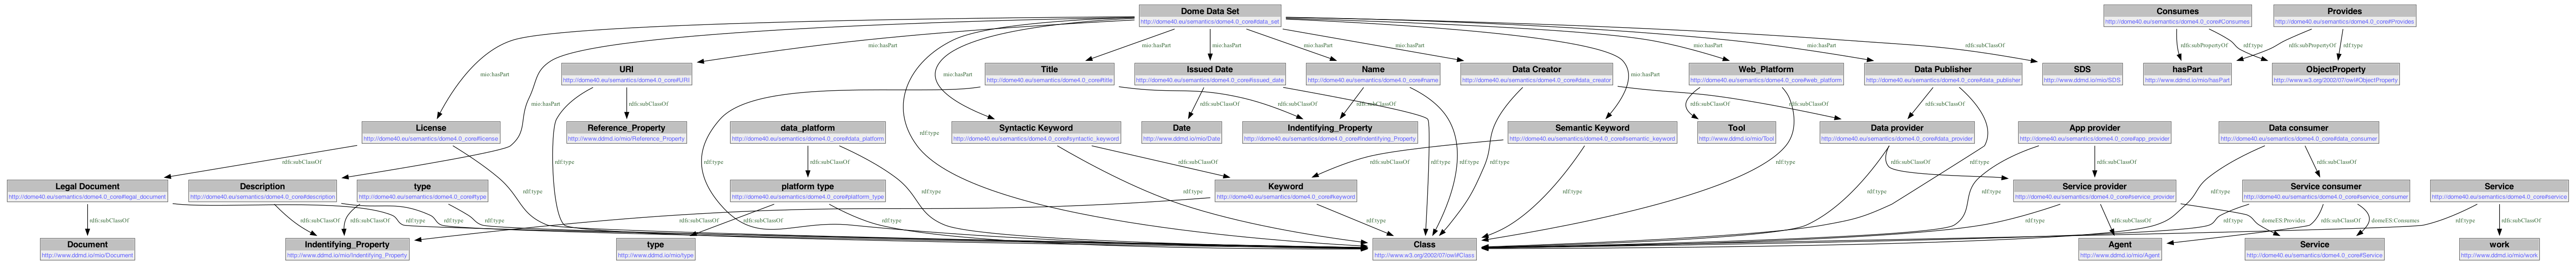

In [9]:
vis(dome.g)

## Load the Materials Informatics Ontology (MIO) 
- MIO is a new top level ontology compliant with EMMO but is  optimised for practical applications
- EMMO requires heavy use of reasoners as it is built on logic,
- This poses heavy constraints on applications, as one has to deal with complex structures, e.g., [composite complex classes](https://www.w3.org/TR/owl2-primer/#Advanced_Class_Relationships) requiring intensive inference in real time
- MIO is simple and focuses on practical applications, especially for software engineering perspective

In [10]:
mio=Graph(bind_namespaces="rdflib")
mio.parse("/Users/adham/dev/ontology/ontology_manager/MIO/mio/mio.ttl")

<Graph identifier=N3edc34ad292d44c0b4b7245278a635b9 (<class 'rdflib.graph.Graph'>)>

# Visualise 

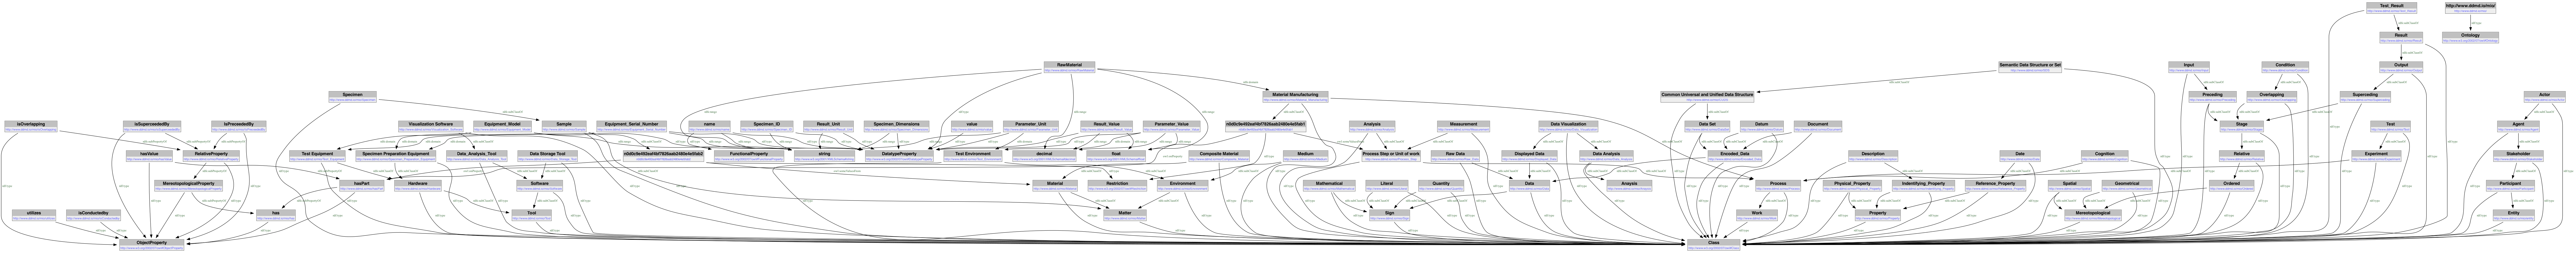

In [11]:
vis(mio)

# Advanced Visualisation and integration of ontology 
We rely on [RDFLIB](https://rdflib.readthedocs.io/en/stable/#) like many other open source programs for RDF management, but augment it with additional tools both in house and external!
- OntoVis, SimPhoNy-Future, Ontology Manager, SigraDB, OMI, are in house
# Combine ontology from multiple resources and zoom into the data set with cross connections

In [12]:
# Using the power of RDFLIB it is easy to combine ontology: 
gc=dome.g+mio
# Using the new OntoVis: Visualisation and inspection is easy 
ovis = OntoVis(gc)

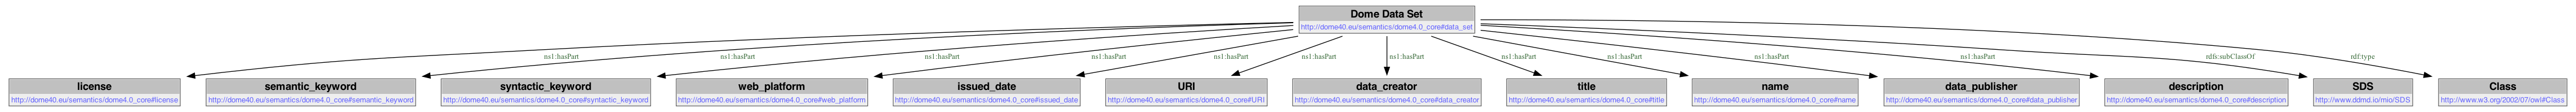

In [13]:
vis(ovis.zoom_in(URIRef("http://dome40.eu/semantics/dome4.0_core#data_set"), 2))

# DOME 4.0 eco system supports all standard ontology 

In [14]:
# these are bindings (RDFLIB) 
binds="""
@prefix domeES: <http://dome40.eu/semantics/dome4.0_core#> .
@prefix mio: <http://www.ddmd.io/mio/> .
@prefix dcat: <http://www.w3.org/ns/dcat#> .
@prefix dcterms: <http://purl.org/dc/terms/> .
@prefix euroscivoc: <http://data.europa.eu/8mn/euroscivoc/> .
@prefix evmpo: <https://emmc.eu/semantics/evmpo/evmpo.ttl#> .
@prefix foaf: <http://xmlns.com/foaf/0.1/> .
@prefix http-meth: <http://www.w3.org/2011/http-methods#> .
@prefix msm: <http://iserve.kmi.open.ac.uk/ns/msm#> .
@prefix owl: <http://www.w3.org/2002/07/owl#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix skos: <http://www.w3.org/2004/02/skos/core#> .
@prefix xs: <http://www.w3.org/2001/XMLSchema#> .
"""


In [15]:
nsbinds=auto_bind_namespaces(dome.g, binds)

g.bind(domeES, http://dome40.eu/semantics/dome4.0_core#)
g.bind(mio, http://www.ddmd.io/mio/)
g.bind(dcat, http://www.w3.org/ns/dcat#)
g.bind(dcterms, http://purl.org/dc/terms/)
g.bind(euroscivoc, http://data.europa.eu/8mn/euroscivoc/)
g.bind(evmpo, https://emmc.eu/semantics/evmpo/evmpo.ttl#)
g.bind(foaf, http://xmlns.com/foaf/0.1/)
g.bind(http-meth, http://www.w3.org/2011/http-methods#)
g.bind(msm, http://iserve.kmi.open.ac.uk/ns/msm#)
g.bind(owl, http://www.w3.org/2002/07/owl#)
g.bind(rdf, http://www.w3.org/1999/02/22-rdf-syntax-ns#)
g.bind(rdfs, http://www.w3.org/2000/01/rdf-schema#)
g.bind(skos, http://www.w3.org/2004/02/skos/core#)
g.bind(xs, http://www.w3.org/2001/XMLSchema#)


In [16]:
print(nsbinds)

{'domeES': Namespace('http://dome40.eu/semantics/dome4.0_core#'), 'mio': Namespace('http://www.ddmd.io/mio/'), 'dcat': Namespace('http://www.w3.org/ns/dcat#'), 'dcterms': Namespace('http://purl.org/dc/terms/'), 'euroscivoc': Namespace('http://data.europa.eu/8mn/euroscivoc/'), 'evmpo': Namespace('https://emmc.eu/semantics/evmpo/evmpo.ttl#'), 'foaf': Namespace('http://xmlns.com/foaf/0.1/'), 'http-meth': Namespace('http://www.w3.org/2011/http-methods#'), 'msm': Namespace('http://iserve.kmi.open.ac.uk/ns/msm#'), 'owl': Namespace('http://www.w3.org/2002/07/owl#'), 'rdf': Namespace('http://www.w3.org/1999/02/22-rdf-syntax-ns#'), 'rdfs': Namespace('http://www.w3.org/2000/01/rdf-schema#'), 'skos': Namespace('http://www.w3.org/2004/02/skos/core#'), 'xs': Namespace('http://www.w3.org/2001/XMLSchema#')}


# We create  now a SimPhoNy-CUDS
- CUDS: Common Universal/Unified Data Structures! 
- Check the MIO and domeES ontology! 

In [17]:
cuds=SimpleNamespace() # we use now simple version, no checks for the demo of ontology types
cuds.g=Graph()
cuds_collection=set()
#cuds.ds=URIRef("http://dome40.eu/semantics/dome4.0_core#data_set")

In [18]:
num_data_sets=10 # the number of synthetic data sets we want to create
domeES=nsbinds['domeES']
mioNS=nsbinds['mio']

In [19]:
# Since this is a demo, we make our own creator, publisher, ... 
## Note we do not claim any relation to materials project by the following, this is merely a demon. 
# these will be instances later of a User/Dataproider etc. 
random_creator = lambda: random.choice(["Perosn 1", "Person 2", "Person 3", "Person 4", "Person 5"])  
# these will be instances later of a User/Dataproider etc. 
random_publisher = lambda: random.choice(["Company 1", "Company 2", "Company 3", "Company 4", "Company 5", "Nature Scientific Data", "MaterialsProject.prg"])  
random_keywords = lambda k: random.sample(s.split('\n'), random.randint(3, 6))

# Let us use <span style="color:red;"> EuroSciVoc </span> as True Semantic keywords!
## and integrate with `MIO+domeES` ontology! 
- Load the EuroSciVoc ontology (mostly individuals, but with clear hierarchy)
- Use SPARQL to pick all the concepts that are relevant for [engineering and technology](https://op.europa.eu/en/web/eu-vocabularies/concept/-/resource?uri=http://data.europa.eu/8mn/euroscivoc/64605fff-1946-4fd4-b021-e2e83b71dcac&lang=en)
- for the demo: Make a function to select randomly 1 to 5 such semantic keywords, and add it to the dataset.

# Attain practical and real <span style="color:green;"> compliance, and use of European Infrastrcutre and investments</span>.
  

In [20]:
esvoc = SimpleNamespace()
esvoc.g = Graph()
esvoc.desc = "the EuroSciVoc"
esvoc.path = "/Users/adham/dev/dome/Ontology-matters/external/EuroSciVoc-skos-ap-eu_1.3.ttl" # Once we find and end point, we can get this from teh net directly. 
esvoc.g.parse(esvoc.path)
# SPARQL query to choose all elements narrower than engineering and technology. 
q="""
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?narrowerConcept ?narrowerLabel 
WHERE {
    ?narrowerConcept skos:broader+ <http://data.europa.eu/8mn/euroscivoc/64605fff-1946-4fd4-b021-e2e83b71dcac> .
    ?narrowerConcept skos:prefLabel ?narrowerLabel .
        FILTER(LANGMATCHES(LANG(?narrowerLabel), "en"))
}
"""
# Noe the UUID may change between versions,  need to confirm! 

In [21]:
# run the query 
esvoc.r = esvoc.g.query(q)

In [22]:
#for i in esvoc.r:
#    print(i)
printH(f" We find {len(esvoc.r)} semantic keywords relevant for technology and engineering")

 We find 208 semantic keywords relevant for technology and engineering:


In [23]:
esvoc.r_formated = [{'IRI': str(row.narrowerConcept), 'Label': str(row.narrowerLabel)} for row in esvoc.r]
esvoc.random = lambda r: random.sample([[r_['IRI'], r_['Label']] for r_ in r], random.randint(2, 6))
for i in range(3):
    print(esvoc.random(esvoc.r_formated))

[['http://data.europa.eu/8mn/euroscivoc/c2a8caf5-4ee8-43ff-a3cd-bae7430e4e18', 'supercomputers'], ['http://data.europa.eu/8mn/euroscivoc/0085a6d1-0b32-479f-a560-0cbf6cffee9b', 'astronautical engineering'], ['http://data.europa.eu/8mn/euroscivoc/8d83b645-355f-4cf1-abf3-ce4cd3172c34', 'radio frequency'], ['http://data.europa.eu/8mn/euroscivoc/abadc19a-13ab-4bc6-951b-8f12226b3e8b', 'cognitive radio']]
[['http://data.europa.eu/8mn/euroscivoc/ece8d70d-2311-4d6d-ae12-473fc5c09a5d', 'sustainable architecture'], ['http://data.europa.eu/8mn/euroscivoc/e4062af9-fc49-4826-9bdb-e549f3f0f191', 'food technology'], ['http://data.europa.eu/8mn/euroscivoc/eeb88fa8-7b5a-440f-a3c9-add16c6b5cd2', 'mobile radio']]
[['http://data.europa.eu/8mn/euroscivoc/7b002931-b33d-4f72-87db-4ae7db02e938', 'bioleaching'], ['http://data.europa.eu/8mn/euroscivoc/c835a32d-04c8-493b-9644-203414287c92', 'composites'], ['http://data.europa.eu/8mn/euroscivoc/e4062af9-fc49-4826-9bdb-e549f3f0f191', 'food technology'], ['http://da

In [24]:
for i in range(1, num_data_sets + 1):
    cuds.ds = URIRef(f"{domeES}DS_{i}")
    cuds.uri = URIRef(f"{domeES}DS_{i}")
    cuds.g.add((cuds.ds, RDF.type, domeES.data_set))
    
    # Add the required DOME 4.0 Data Set Ontology attributes
    # These are cuds.add(spo triplet)
    # cuds.uri = URIRef(f"http://materialsproject.org/data/calc_{i}")

    mpid=generate_random_materialproject_id()
    #uri = URIRef("https://next-gen.materialsproject.org/materials/mp-19149")
    uri=URIRef(f"https://next-gen.materialsproject.org/materials/{mpid}")
    cuds.g.add( (uri, RDF.type, domeES.URI) ) 
    cuds.g.add((cuds.ds, domeES.hasPart, uri))
    
    printH(f"this is a DOME 4.0 Data Set: {cuds.ds}")
    printH(f"this Data Set point to: {uri}")

    wp = URIRef("https://next-gen.materialsproject.org/")
    cuds.g.add( (wp, RDF.type, domeES.web_platform) ) 
    cuds.g.add((cuds.ds, domeES.hasPart, wp))

    dc = URIRef(f"{domeES}/{generate_uuid()}")
    cuds.g.add( (dc, RDF.type, domeES.issued_date) )    
    the_date=Literal(random_date_time())
    cuds.g.add( (cuds.ds, domeES.hasPart, dc) )
    cuds.g.add( (dc, mioNS.hasValue, the_date) ) 

    dc = URIRef(f"{domeES}/{generate_uuid()}")
    cuds.g.add( (dc, RDF.type, domeES.description) )    
    the_value=Literal("This is a description that will change later")
    cuds.g.add( (cuds.ds, domeES.hasPart, dc) )
    cuds.g.add( (dc, mioNS.hasValue, the_value) )

    dc = URIRef(f"{domeES}/{generate_uuid()}")
    cuds.g.add( (dc, RDF.type, domeES.data_creator) )    
    the_value=Literal(random_creator())
    cuds.g.add( (cuds.ds, domeES.hasPart, dc) )
    cuds.g.add( (dc, mioNS.hasValue, the_value) )

    dc = URIRef(f"{domeES}/{generate_uuid()}")
    cuds.g.add( (dc, RDF.type, domeES.license) )    
    the_value=Literal("CC-BY 4.0")
    cuds.g.add( (cuds.ds, domeES.hasPart, dc) )
    cuds.g.add( (dc, mioNS.hasValue, the_value) )


    dc = URIRef(f"{domeES}/{generate_uuid()}")
    cuds.g.add( (dc, RDF.type, domeES.data_publisher) )    
    the_value=Literal(random_publisher())
    cuds.g.add( (cuds.ds, domeES.hasPart, dc) )
    cuds.g.add( (dc, mioNS.hasValue, the_value) )

    dc = URIRef(f"{domeES}/{generate_uuid()}")
    cuds.g.add( (dc, RDF.type, domeES.title) )    
    the_value=Literal("this is a title placeholder")
    cuds.g.add( (cuds.ds, domeES.hasPart, dc) )
    cuds.g.add( (dc, mioNS.hasValue, the_value) )


    # get some semantic EUROSCIVOC keywords for demo 
    ks=esvoc.random(esvoc.r_formated)
    for k in ks:
        print(k[1])
        dc = URIRef(k[0])
        cuds.g.add( (dc, RDF.type, domeES.semantic_keyword) )    
        cuds.g.add( (dc, RDFS.label, Literal(k[1]) ))    
        cuds.g.add( (cuds.ds, domeES.hasPart, dc) )
        
   # g.add((data_set_uri, mio.hasPart, domeES.syntactic_keyword))
    

this is a DOME 4.0 Data Set: http://dome40.eu/semantics/dome4.0_core#DS_1:
this Data Set point to: https://next-gen.materialsproject.org/materials/mp-77:
food safety
telecommunications
environmental biotechnology
this is a DOME 4.0 Data Set: http://dome40.eu/semantics/dome4.0_core#DS_2:
this Data Set point to: https://next-gen.materialsproject.org/materials/mp-91:
other engineering and technologies
environmental engineering
this is a DOME 4.0 Data Set: http://dome40.eu/semantics/dome4.0_core#DS_3:
this Data Set point to: https://next-gen.materialsproject.org/materials/mp-27:
computer hardware
architecture engineering
this is a DOME 4.0 Data Set: http://dome40.eu/semantics/dome4.0_core#DS_4:
this Data Set point to: https://next-gen.materialsproject.org/materials/mp-113:
electrodialysis
civil engineering
this is a DOME 4.0 Data Set: http://dome40.eu/semantics/dome4.0_core#DS_5:
this Data Set point to: https://next-gen.materialsproject.org/materials/mp-75:
solar thermal
electric power gen

### Any data set (given as a IRI in general) **can be a DOME 4.0 Data Set**, this is simply achieved with the following line:

```
g.add((someURI, RDF.type, domeES.data_set))

```

In [25]:
gc=cuds.g+dome.g+mio
ovis = OntoVis(gc)

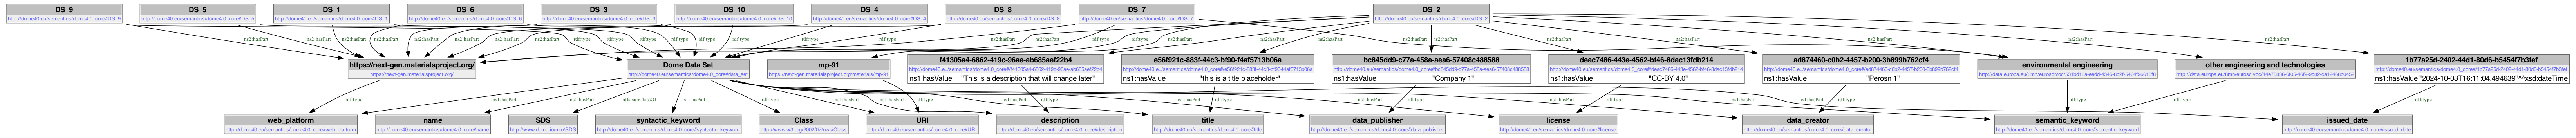

In [26]:
vis(ovis.zoom_in(URIRef("http://dome40.eu/semantics/dome4.0_core#DS_2"), 3))

In [27]:
inspect_iri=URIRef("http://dome40.eu/semantics/dome4.0_core#DS_2")
q="""
SELECT ?predicate ?object
WHERE {
    <http://dome40.eu/semantics/dome4.0_core#DS_2> ?predicate ?object .
}
"""
DS99 = Graph()
r=gc.query(q)
for i in r:
    DS99.add((inspect_iri, i.predicate, i.object))
    q2 = f"""
    SELECT ?predicate ?object
    WHERE {{
        <{i.object}> ?predicate ?object .
    }}
    """
    r2 = gc.query(q2)
    for j in r2:
        DS99.add((j.object, j.predicate, j.object))
        print(j.object, j.predicate, j.object)

http://dome40.eu/semantics/dome4.0_core#data_creator http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://dome40.eu/semantics/dome4.0_core#data_creator
Perosn 1 http://www.ddmd.io/mio/hasValue Perosn 1
environmental engineering http://www.w3.org/2000/01/rdf-schema#label environmental engineering
http://dome40.eu/semantics/dome4.0_core#semantic_keyword http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://dome40.eu/semantics/dome4.0_core#semantic_keyword
http://dome40.eu/semantics/dome4.0_core#title http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://dome40.eu/semantics/dome4.0_core#title
this is a title placeholder http://www.ddmd.io/mio/hasValue this is a title placeholder
http://dome40.eu/semantics/dome4.0_core#data_publisher http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://dome40.eu/semantics/dome4.0_core#data_publisher
Company 1 http://www.ddmd.io/mio/hasValue Company 1
http://dome40.eu/semantics/dome4.0_core#web_platform http://www.w3.org/1999/02/22-rdf-syntax-ns#type 

In [28]:
for s, p, o in DS99:
    print(s, p, o)

Perosn 1 http://www.ddmd.io/mio/hasValue Perosn 1
this is a title placeholder http://www.ddmd.io/mio/hasValue this is a title placeholder
http://dome40.eu/semantics/dome4.0_core#issued_date http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://dome40.eu/semantics/dome4.0_core#issued_date
http://dome40.eu/semantics/dome4.0_core#URI http://www.ddmd.io/mio/hasPart http://dome40.eu/semantics/dome4.0_core#URI
http://dome40.eu/semantics/dome4.0_core#name http://www.ddmd.io/mio/hasPart http://dome40.eu/semantics/dome4.0_core#name
http://dome40.eu/semantics/dome4.0_core#DS_2 http://dome40.eu/semantics/dome4.0_core#hasPart https://next-gen.materialsproject.org/
other engineering and technologies http://www.w3.org/2000/01/rdf-schema#label other engineering and technologies
2024-10-03T16:11:04.494639 http://www.ddmd.io/mio/hasValue 2024-10-03T16:11:04.494639
http://dome40.eu/semantics/dome4.0_core#web_platform http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://dome40.eu/semantics/dome4.0_cor

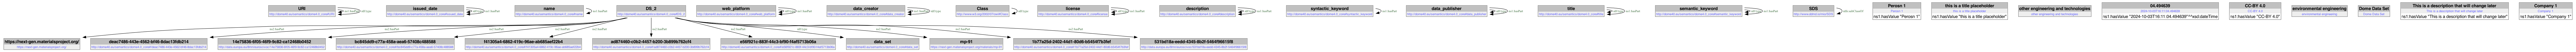

In [29]:
vis(DS99)

In [30]:
q = """
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX domeES: <http://dome40.eu/semantics/dome4.0_core#> 

    SELECT ?s ?p ?o ?oLabel
    WHERE {
        ?s ?p ?o .
        ?o rdfs:label ?oLabel .    
        ?o rdfs:label "medical engineering" .
        }
"""


In [31]:
r=gc.query(q)

In [32]:
for i in r:
    print(i)
    